# **OPTION PRICING**

**MONTE CARLO SIMULATION**

9.291546292691706
6.1869322026575855


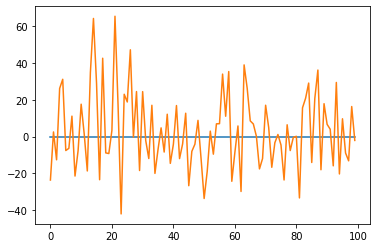

In [38]:
import numpy as np
import math 
import time
from matplotlib import pyplot as plt
from math import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date
import numpy as np
import pandas as pd
from pandas import DataFrame

class OptionPricing:
  def __init__(self,S0,E,T,rf,sigma,iterations):
    self.S0=S0;
    self.E=E;
    self.T=T;
    self.rf=rf;
    self.sigma=sigma;
    self.iterations=iterations;
  
  def call_option_simulation(self):
    option_data=np.zeros([self.iterations,2]);
    rand=np.random.normal(0,1,[1,self.iterations]);
    stock_price=self.S0*np.exp(self.T*(self.rf-0.5*self.sigma**2)+self.sigma*np.sqrt(self.T)*rand);
    option_data[:,1]=stock_price-self.E;
    plt.plot(option_data);
    average=np.sum(np.amax(option_data,axis=1))/float(self.iterations);
    return np.exp(-1.0*self.rf*self.T)*average;
  

  def put_option_simulation(self):
    option_data=np.zeros([self.iterations,2]);
    rand=np.random.normal(0,1,[1,self.iterations]);
    stock_price=self.S0*np.exp(self.T*(self.rf-0.5*self.sigma**2)+self.sigma*np.sqrt(self.T)*rand);
    option_data[:,1]=self.E-stock_price;
    #plt.plot(option_data);
    average=np.sum(np.amax(option_data,axis=1))/float(self.iterations);
    return np.exp(-1.0*self.rf*self.T)*average;

if __name__=='__main__':
  S0=100;
  E=100;
  T=1;
  rf=0.05;
  sigma=0.2;
  iterations=100;

  model=OptionPricing(S0,E,T,rf,sigma,iterations);
  print(model.call_option_simulation());
  print(model.put_option_simulation());

# **BLACK** **SCHOLES** **MODEL**

In [0]:
def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2/2.)*T)/sigma*sqrt(T)
def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)
def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))
def bs_put(S,K,T,r,sigma):
    return K*exp(-r*T)-S+bs_call(S,K,T,r,sigma)
def call_delta(S,K,T,r,sigma):
    return norm.cdf(d1(S,K,T,r,sigma))
def call_gamma(S,K,T,r,sigma):
    return norm.pdf(d1(S,K,T,r,sigma))/(S*sigma*sqrt(T))
def call_vega(S,K,T,r,sigma):
    return 0.01*(S*norm.pdf(d1(S,K,T,r,sigma))*sqrt(T))
def call_theta(S,K,T,r,sigma):
    return 0.01*(-(S*norm.pdf(d1(S,K,T,r,sigma))*sigma)/(2*sqrt(T)) - r*K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma)))
def call_rho(S,K,T,r,sigma):
    return 0.01*(K*T*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma)))
def put_delta(S,K,T,r,sigma):
    return -norm.cdf(-d1(S,K,T,r,sigma))
def put_gamma(S,K,T,r,sigma):
    return norm.pdf(d1(S,K,T,r,sigma))/(S*sigma*sqrt(T))
def put_vega(S,K,T,r,sigma):
    return 0.01*(S*norm.pdf(d1(S,K,T,r,sigma))*sqrt(T))
def put_theta(S,K,T,r,sigma):
    return 0.01*(-(S*norm.pdf(d1(S,K,T,r,sigma))*sigma)/(2*sqrt(T)) + r*K*exp(-r*T)*norm.cdf(-d2(S,K,T,r,sigma)))
def put_rho(S,K,T,r,sigma):
    return 0.01*(-K*T*exp(-r*T)*norm.cdf(-d2(S,K,T,r,sigma)))

In [40]:
## input the current stock price and check if it is a number.
S = input("What is the current stock price? ");
while True:
    try:
        S = float(S)
        break
    except:
        print("The current stock price has to be a NUMBER.")
        S = input("What is the current stock price? ")

## input the strike price and check if it is a number.
K = input("What is the strike price? ");
while True:
    try:
        K = float(K)
        break
    except:
        print("The the strike price has to be a NUMBER.")
        K = input("What is the strike price? ")


## input the expiration_date and calculate the days between today and the expiration date.
while True:
    expiration_date = input("What is the expiration date of the options? (mm-dd-yyyy) ")
    try:
        expiration_date = datetime.strptime(expiration_date, "%m-%d-%Y")
    except ValueError as e:
        print("error: %s\nTry again." % (e,))
    else:
        break
T = (expiration_date - datetime.utcnow()).days / 365


## input the continuously compounding risk-free interest rate and check if it is a number.
r = input("What is the continuously compounding risk-free interest rate in percentage(%)? ");
while True:
    try:
        r = float(r)
        break
    except:
        print("The continuously compounding risk-free interest rate has to be a NUMBER.")
        r = input("What is the continuously compounding risk-free interest rate in percentage(%)? ")
        

## input the volatility and check if it is a number.
sigma = input("What is the volatility in percentage(%)? "); 
while True:
    try:
        sigma = float(sigma)
        if sigma > 100 or sigma < 0:
            print ( "The range of sigma has to be in [0,100].")
            sigma = input("What is the volatility in percentage(%)? ")
        break
    except:
        print("The volatility has to be a NUMBER.")
        sigma = input("What is the volatility in percentage(%)? ")

What is the current stock price? 100
What is the strike price? 100
What is the expiration date of the options? (mm-dd-yyyy) 05-01-2021
What is the continuously compounding risk-free interest rate in percentage(%)? 5
What is the volatility in percentage(%)? 20


In [41]:
data = {'Symbol': ['S', 'K', 'T', 'r', 'sigma'],
        'Input': [S, K, T , r , sigma]}
input_frame = DataFrame(data, columns=['Symbol', 'Input'], 
                   index=['Underlying price', 'Strike price', 'Time to maturity', 'Risk-free interest rate', 'Volatility'])
input_frame

,Symbol,Input
Underlying price,S,100.000000
Strike price,K,100.000000
Time to maturity,T,1.317808
Risk-free interest rate,r,5.000000
Volatility,sigma,20.000000


In [42]:
from datetime import datetime, date
r = r/100; sigma = sigma/100;
T=1;
price_and_greeks = {'Call' : [bs_call(S,K,T,r,sigma), call_delta(S,K,T,r,sigma), call_gamma(S,K,T,r,sigma),call_vega(S,K,T,r,sigma), call_rho(S,K,T,r,sigma), call_theta(S,K,T,r,sigma)],
                    'Put' : [bs_put(S,K,T,r,sigma), put_delta(S,K,T,r,sigma), put_gamma(S,K,T,r,sigma),put_vega(S,K,T,r,sigma), put_rho(S,K,T,r,sigma), put_theta(S,K,T,r,sigma)]}
price_and_greeks_frame = DataFrame(price_and_greeks, columns=['Call','Put'], index=['Price', 'delta', 'gamma','vega','rho','theta'])
price_and_greeks_frame

,Call,Put
Price,10.450584,5.573526
delta,0.636831,-0.363169
gamma,0.018762,0.018762
vega,0.375240,0.375240
rho,0.532325,-0.418905
theta,-0.064140,-0.016579


2.7764531888282233
0.293967596023772


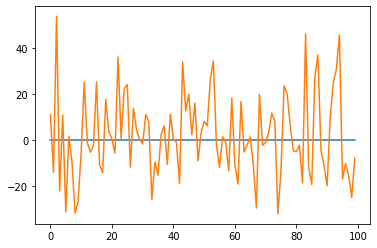

In [43]:
from sklearn.metrics import mean_squared_error
true_call=price_and_greeks['Call'][0]
pred_call=model.call_option_simulation()

true_put=price_and_greeks['Put'][0]
pred_put=model.put_option_simulation()

Call_error=sqrt((pred_call-true_call)**2)
Put_error=sqrt((pred_put-true_put)**2)
print(Call_error)
print(Put_error)

# **BINOMIAL** **MODEL**

In [0]:
def Cox_Ross_Rubinstein_Tree (S,K,T,r,sigma,N, Option_type):
    
    # Underlying price (per share): S; 
    # Strike price of the option (per share): K;
    # Time to maturity (years): T;
    # Continuously compounding risk-free interest rate: r;
    # Volatility: sigma;
    # Number of binomial steps: N;

        # The factor by which the price rises (assuming it rises) = u ;
        # The factor by which the price falls (assuming it falls) = d ;
        # The probability of a price rise = pu ;
        # The probability of a price fall = pd ;
        # discount rate = disc ;
    
    u=math.exp(sigma*math.sqrt(T/N));
    d=math.exp(-sigma*math.sqrt(T/N));
    pu=((math.exp(r*T/N))-d)/(u-d);
    pd=1-pu;
    disc=math.exp(-r*T/N);

    St = [0] * (N+1)
    C = [0] * (N+1)
    
    St[0]=S*d**N;
    
    for j in range(1, N+1): 
        St[j] = St[j-1] * u/d;
    
    for j in range(1, N+1):
        if Option_type == 'P':
            C[j] = max(K-St[j],0);
        elif Option_type == 'C':
            C[j] = max(St[j]-K,0);
    
    for i in range(N, 0, -1):
        for j in range(0, i):
            C[j] = disc*(pu*C[j+1]+pd*C[j]);
            
    return C[0]


## define Jarrow_Rudd binomial model    
def Jarrow_Rudd_Tree (S,K,T,r,sigma,N, Option_type):

    # Underlying price (per share): S; 
    # Strike price of the option (per share): K;
    # Time to maturity (years): T;
    # Continuously compounding risk-free interest rate: r;
    # Volatility: sigma;
    # Steps: N;
    
        # The factor by which the price rises (assuming it rises) = u ;
        # The factor by which the price falls (assuming it falls) = d ;
        # The probability of a price rise = pu ;
        # The probability of a price fall = pd ;
        # discount rate = disc ;
        
    u=math.exp((r-(sigma**2/2))*T/N+sigma*math.sqrt(T/N));
    d=math.exp((r-(sigma**2/2))*T/N-sigma*math.sqrt(T/N));
    pu=0.5;
    pd=1-pu;
    disc=math.exp(-r*T/N);

    St = [0] * (N+1)
    C = [0] * (N+1)
    
    St[0]=S*d**N;
    
    for j in range(1, N+1): 
        St[j] = St[j-1] * u/d;
    
    for j in range(1, N+1):
        if Option_type == 'P':
            C[j] = max(K-St[j],0);
        elif Option_type == 'C':
            C[j] = max(St[j]-K,0);
    
    for i in range(N, 0, -1):
        for j in range(0, i):
            C[j] = disc*(pu*C[j+1]+pd*C[j]);
            
    return C[0]

In [45]:
r = r/100; sigma = sigma/100;
binomial_model_pricing = {'Option' : ['Call', 'Put', 'Call', 'Put'],
                          'Price': [Cox_Ross_Rubinstein_Tree(S, K, T, r, sigma,1000,'C'), Cox_Ross_Rubinstein_Tree(S, K, T, r, sigma,1000,'P'),
                                     Jarrow_Rudd_Tree(S, K, T, r, sigma,1000,'C'), Jarrow_Rudd_Tree(S, K, T, r, sigma,1000,'P')]}
binomial_model_pricing_frame = DataFrame(binomial_model_pricing, columns=[ 'Option', 'Price'], 
                   index = ['Cox-Ross-Rubinstein','Cox-Ross-Rubinstein', 'Jarrow-Rudd', 'Jarrow-Rudd'])                                        
binomial_model_pricing_frame

,Option,Price
Cox-Ross-Rubinstein,Call,0.107222
Cox-Ross-Rubinstein,Put,0.057234
Jarrow-Rudd,Call,0.107232
Jarrow-Rudd,Put,0.057244


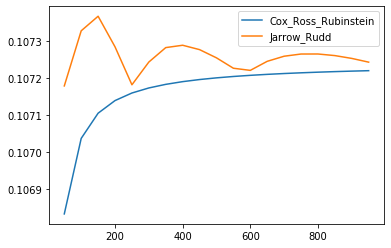

In [46]:
runs1 = list(range(50,1000,50))
CRR1 = []
JR1 = []

for i in runs1:
    CRR1.append(Cox_Ross_Rubinstein_Tree(S, K, T, r, sigma,i ,'C'))
    JR1.append(Jarrow_Rudd_Tree(S, K, T, r, sigma,i ,'C'))

plt.plot(runs1, CRR1, label='Cox_Ross_Rubinstein')
plt.plot(runs1, JR1, label='Jarrow_Rudd')
plt.legend(loc='upper right')
plt.show()

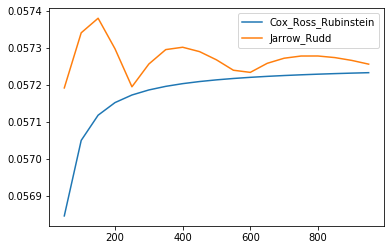

In [61]:
runs2 = list(range(50,1000,50))
CRR2 = []
JR2 = []

for i in runs2:
    CRR2.append(Cox_Ross_Rubinstein_Tree(S, K, T, r, sigma,i ,'P'))
    JR2.append(Jarrow_Rudd_Tree(S, K, T, r, sigma,i ,'P'))

plt.plot(runs2, CRR2, label='Cox_Ross_Rubinstein')
plt.plot(runs2, JR2, label='Jarrow_Rudd')
plt.legend(loc='upper right')
plt.show()

# **BUTTERFLY SPREAD OPTION STRATEGY**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [0]:
def call_payoff (sT, strike_price, premium):
  return np.where(sT> strike_price, sT-strike_price, 0)-premium
# Spot Price
s0 = 40
# Long Call
higher_strike_price_long_call = 35
lower_strike_price_long_call=30
premium_higher_strike_long_call = 0.85
premium_lower_strike_long_call = 3.15
# Short Call
strike_price_short_call = 32.5
premium_short_call = 1.80
# Range of call option at expiration
sT = np.arange(10,60,1)

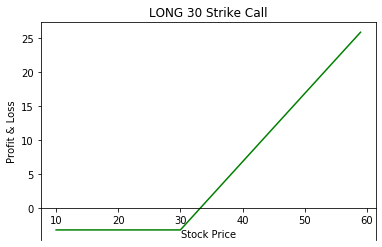

In [68]:
# OTM Strike Long Call Payoff
lower_strike_long_call_payoff = call_payoff(sT, lower_strike_price_long_call, premium_lower_strike_long_call)
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,lower_strike_long_call_payoff, color='g')
ax.set_title('LONG 30 Strike Call')
plt.xlabel('Stock Price')
plt.ylabel('Profit & Loss')
plt.show()

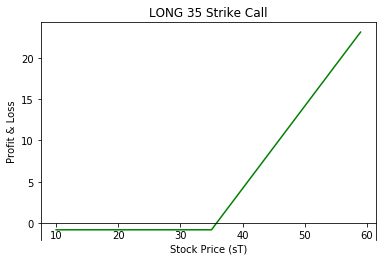

In [71]:
# Higher Strike Long Call Payoff
higher_strike_long_call_payoff = call_payoff(sT, higher_strike_price_long_call, premium_higher_strike_long_call)
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,higher_strike_long_call_payoff, color='g')
ax.set_title('LONG 35 Strike Call')
plt.xlabel('Stock Price (sT)')
plt.ylabel('Profit & Loss')
plt.show()

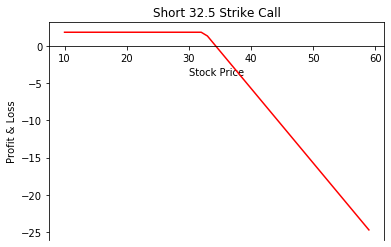

In [72]:
# Short Call Payoff
Short_call_payoff = call_payoff(sT, strike_price_short_call, premium_short_call)*-1.0
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT, Short_call_payoff, color='r')
ax.set_title('Short 32.5 Strike Call')
plt.xlabel('Stock Price')
plt.ylabel('Profit & Loss')
plt.show()

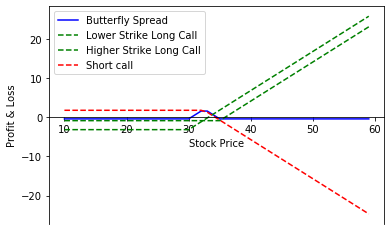

In [73]:
Butterfly_spread_payoff = lower_strike_long_call_payoff + higher_strike_long_call_payoff + 2 *Short_call_payoff
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,Butterfly_spread_payoff ,color='b', label= 'Butterfly Spread')
ax.plot(sT, lower_strike_long_call_payoff,'--', color='g',label='Lower Strike Long Call')
ax.plot(sT, higher_strike_long_call_payoff,'--', color='g', label='Higher Strike Long Call')
ax.plot(sT, Short_call_payoff, '--', color='r', label='Short call')
plt.legend()
plt.xlabel('Stock Price')
plt.ylabel('Profit & Loss')
plt.show()

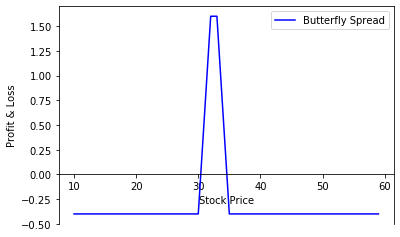

In [74]:
Butterfly_spread_payoff = lower_strike_long_call_payoff + higher_strike_long_call_payoff + 2 *Short_call_payoff
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,Butterfly_spread_payoff ,color='b', label= 'Butterfly Spread')
plt.legend()
plt.xlabel('Stock Price')
plt.ylabel('Profit & Loss')
plt.show()

In [75]:
profit = max(Butterfly_spread_payoff)
loss = min(Butterfly_spread_payoff)
print ("%.2f" %profit)
print ("%.2f" %loss)

1.60
-0.40


# **IRON CONDOR OPTION STRATEGY**

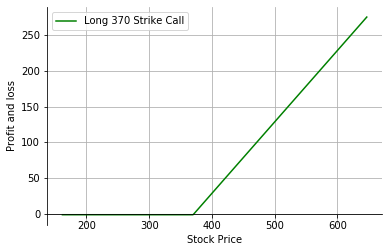

In [80]:
spot_price = 323.40
# Long call
strike_price_long_call = 370
premium_long_call = 1.30
# Short call
strike_price_short_call = 350
premium_short_call = 3.30
# Stock price range at expiration of the call
sT = np.arange(0.5*spot_price,2*spot_price,1)
payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)

fig, ax = plt.subplots()

ax.spines['bottom'].set_position('zero')

ax.plot(sT,payoff_long_call,label='Long 370 Strike Call',color='g')

plt.xlabel('Stock Price')

plt.ylabel('Profit and loss')

plt.legend()


ax.spines['top'].set_visible(False) # Top border removed

ax.spines['right'].set_visible(False) # Right border removed
#ax.tick_params(top=False, right=False) # Removes the tick-marks on the RHS

plt.grid()

plt.show()

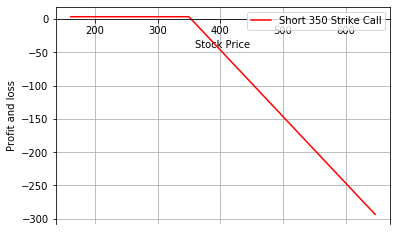

In [81]:
payoff_short_call = call_payoff(sT, strike_price_short_call, premium_short_call) * -1.0

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_call,label='Short 350 Strike Call',color='r')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.grid()
plt.show()

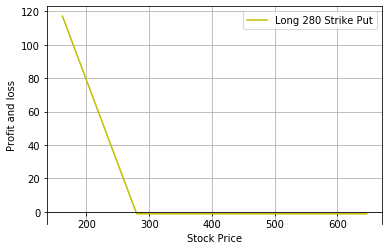

In [86]:
def put_payoff (sT, strike_price, premium): 
  return np.where(sT< strike_price, strike_price-sT, 0)-premium
# Stock price
spot_price = 323.40
# Long put
strike_price_long_put = 280
premium_long_put = 1.20
# Short put
strike_price_short_put = 300
premium_short_put = 3.40
# Stock price range at expiration of the put
sT = np.arange(0.5*spot_price,2*spot_price,1)
payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)


fig, ax = plt.subplots()

ax.spines['bottom'].set_position('zero')

ax.plot(sT,payoff_long_put,label='Long 280 Strike Put',color='y')

plt.xlabel('Stock Price')

plt.ylabel('Profit and loss')

plt.legend()

plt.grid()

plt.show()



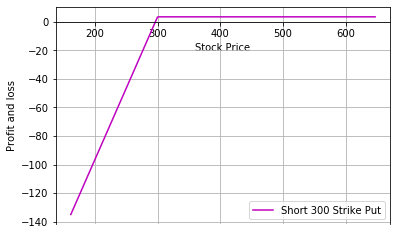

In [87]:
payoff_short_put = put_payoff(sT, strike_price_short_put, premium_short_put) * -1.0
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_put,label='Short 300 Strike Put',color='m')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.grid()
plt.show()

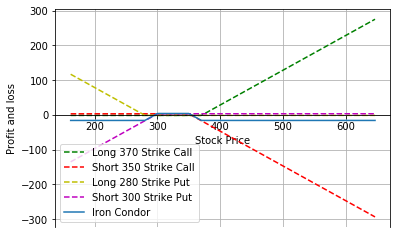

In [88]:
payoff = payoff_long_call + payoff_short_call + payoff_long_put + payoff_short_put
fig, ax = plt.subplots()

ax.spines['bottom'].set_position('zero')

ax.plot(sT,payoff_long_call,'--',label='Long 370 Strike Call',color='g')

ax.plot(sT,payoff_short_call,'--',label='Short 350 Strike Call',color='r')

ax.plot(sT,payoff_long_put,'--',label='Long 280 Strike Put',color='y')

ax.plot(sT,payoff_short_put,'--',label='Short 300 Strike Put',color='m')

ax.plot(sT,payoff,label='Iron Condor')

plt.xlabel('Stock Price')

plt.ylabel('Profit and loss')

plt.legend()

plt.grid()

plt.show()